In [1]:
import math
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
N = 50                              
x_start, x_end = -2.0, 2.0            
y_start, y_end = -1.0, 1.0            
x = numpy.linspace(x_start, x_end, N)    
y = numpy.linspace(y_start, y_end, N)    
X, Y = numpy.meshgrid(x, y)

In [3]:
kappa = 1.0                           
x_doublet, y_doublet = 0.0, 0.0       
u_inf = 1.0

In [4]:
def get_velocity_doublet(strength, xd, yd, X, Y):
   
    u = (-strength / (2 * math.pi) *
         ((X - xd)**2 - (Y - yd)**2) /
         ((X - xd)**2 + (Y - yd)**2)**2)
    v = (-strength / (2 * math.pi) *
         2 * (X - xd) * (Y - yd) /
         ((X - xd)**2 + (Y - yd)**2)**2)
    
    return u, v

def get_stream_function_doublet(strength, xd, yd, X, Y):
    
    psi = -strength / (2 * math.pi) * (Y - yd) / ((X - xd)**2 + (Y - yd)**2)
    
    return psi

In [5]:
u_doublet, v_doublet = get_velocity_doublet(kappa, x_doublet, y_doublet, X, Y)
psi_doublet = get_stream_function_doublet(kappa, x_doublet, y_doublet, X, Y)
u_freestream = u_inf * numpy.ones((N, N), dtype=float)
v_freestream = numpy.zeros((N, N), dtype=float)
psi_freestream = u_inf * Y
u = u_freestream + u_doublet
v = v_freestream + v_doublet
psi = psi_freestream + psi_doublet

0.3989422804014327 0.0
-0.3989422804014327 0.0


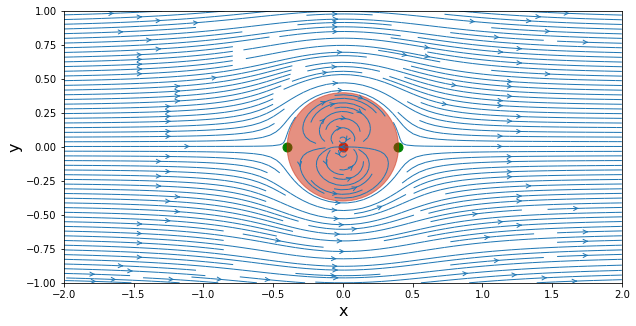

In [6]:
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o')
R = math.sqrt(kappa / (2 * math.pi * u_inf))
circle = pyplot.Circle((0, 0), radius=R, color='#CD2305', alpha=0.5)
pyplot.gca().add_patch(circle)
x_stagn1, y_stagn1 = +math.sqrt(kappa / (2 * math.pi * u_inf)), 0.0
x_stagn2, y_stagn2 = -math.sqrt(kappa / (2 * math.pi * u_inf)), 0.0
    
pyplot.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2],
               color='g', s=80, marker='o');
print(x_stagn1, y_stagn1)
print(x_stagn2, y_stagn2)

In [7]:
gamma = (4*pi*R*u_inf)                     
x_vortex, y_vortex = 0.0, 0.0

NameError: name 'pi' is not defined

In [ ]:
def get_velocity_vortex(strength, xv, yv, X, Y):
    
    u = +strength / (2 * math.pi) * (Y - yv) / ((X - xv)**2 + (Y - yv)**2)
    v = -strength / (2 * math.pi) * (X - xv) / ((X - xv)**2 + (Y - yv)**2)
    
    return u, v

def get_stream_function_vortex(strength, xv, yv, X, Y):
    
    psi = strength / (4 * math.pi) * numpy.log((X - xv)**2 + (Y - yv)**2)
    
    return psi

In [ ]:
u_vortex, v_vortex = get_velocity_vortex(gamma, x_vortex, y_vortex, X, Y)
psi_vortex = get_stream_function_vortex(gamma, x_vortex, y_vortex, X, Y)

In [ ]:
u = u_freestream + u_doublet + u_vortex
v = v_freestream + v_doublet + v_vortex
psi = psi_freestream + psi_doublet + psi_vortex

In [ ]:
R = math.sqrt(kappa / (2 * math.pi * u_inf))
print(R)
x_stagn1, y_stagn1 = (+math.sqrt(R**2 - (gamma / (4 * math.pi * u_inf))**2),
                      -gamma / (4 * math.pi * u_inf))
x_stagn2, y_stagn2 = (-math.sqrt(R**2 - (gamma / (4 * math.pi * u_inf))**2),
                      -gamma / (4 * math.pi * u_inf))
print(x_stagn1,y_stagn1)
print(x_stagn2,y_stagn2)
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v,
                  density=2, linewidth=1, arrowsize=1.5, arrowstyle='->')
circle = pyplot.Circle((0.0, 0.0), radius=R, color='#CD2305', alpha=0.5)
pyplot.gca().add_patch(circle)
pyplot.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o')
pyplot.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2],
               color='g', s=80, marker='o');

In [ ]:
theta = numpy.linspace(0.0, 2 * math.pi, 100)
u_theta = -2 * u_inf * numpy.sin(theta) - gamma / (2 * math.pi * R)
cp = 1.0 - (u_theta / u_inf)**2
u_theta_no_vortex = -2 * u_inf * numpy.sin(theta)
cp_no_vortex = 1.0 - (u_theta_no_vortex / u_inf)**2
size = 6
pyplot.figure(figsize=(size, size))
pyplot.grid(True)
pyplot.xlabel(r'$\theta$', fontsize=18)
pyplot.ylabel('$C_p$', fontsize=18)
pyplot.xlim(theta.min(), theta.max())
pyplot.plot(theta, cp,
            label='with vortex', color='#CD2305', linewidth=2, linestyle='-')
pyplot.plot(theta, cp_no_vortex,
            label='without vortex', color='g', linewidth=2, linestyle='-')
pyplot.legend(loc='best', prop={'size':16});

In [ ]:
from IPython.display import Image
Image(url='http://upload.wikimedia.org/wikipedia/commons/7/78/Flettner_Rotor_Aircraft.jpg')

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('POHre1P_E1k')